# Student grades prediction
Project Description
The dataset contains grades scored by students throughout their university tenure in various
courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams
CGPA : The cumulative GPA based on the four year total grade progress of each candidate .
CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets
representing candidates&#39; departments and XXX are numbers where first X represents the year
the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

Dataset Link-
 https://github.com/dsrscientist/dataset4
 https://github.com/dsrscientist/dataset4/blob/main/Grades.csv

In [271]:
# Importing the required library 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [272]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [273]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [274]:
columns = df.columns

In [275]:
columns


Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [276]:
df.shape

(571, 43)

In [277]:
print ("No. of rows",df.shape[0])
print ("No. of columns",df.shape[1])

No. of rows 571
No. of columns 43


In [278]:
# to check the no. of unique values present in the data. 
df.nunique().to_frame("No. of unique value")

,No. of unique value
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


In [279]:
df['CS-318'].unique()

array(['C-', 'A-', 'B+', 'B-', 'C', 'B', 'C+', 'D', 'D+', 'A', nan, 'A+',
       'WU', 'F', 'W'], dtype=object)

In [280]:
df['CS-312'].unique()

array(['C-', 'D+', 'B', 'B-', 'C', 'B+', 'C+', 'A-', 'D', nan, 'A', 'F',
       'A+', 'W', 'WU'], dtype=object)

In [281]:
df['CS-412'].unique()

array(['A-', 'B', 'A', 'C+', 'B+', 'C-', 'B-', nan, 'A+', 'C', 'D+', 'F',
       'W', 'D'], dtype=object)

In [282]:
df['CGPA'].nunique()

491

In [283]:
# to check if there are any null values in the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [284]:
# Check the sum of values of null values in the dataframe, 

df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

There are null values present in the dataframe hence, we shall proceed by replacing the null values in the dataframe. 

<AxesSubplot:>

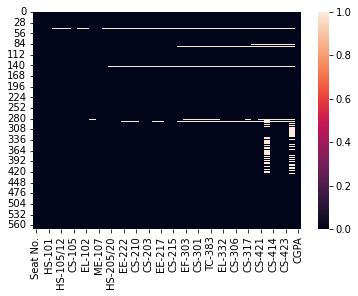

In [285]:
# representing the null values via the maps
sns.heatmap(df.isnull())

In [286]:
import pandas as pd

course_columns = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
                  'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 
                  'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
                  'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331',
                  'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442',
                  'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
                  'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

# Fill NaNs in the course columns with their respective mode
for col in course_columns:
    mode_value = df[col].mode().iloc[0]  # Get the first mode value
    df[col].fillna(value=mode_value, inplace=True)


In [287]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [288]:
# seperating the categorical and the numerical data. 

categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object": 
        categorical_col.append(i)
print("Categorical Columns :  ",categorical_col)
print("/n")

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != "object": 
        numerical_col.append(i)
print("Numerical Columns :  ",numerical_col)
print("/n")

Categorical Columns :   ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
/n
Numerical Columns :   ['CGPA']
/n


In [289]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [290]:
'A+': 10, 'A': 9 , 'A-': 8,'B+': 7,'B': 6,'B-': 5,'C+': 4,'C': 3,'C-': 2,'D+': 1,'D': 0,'F': 0,
'WU': 0 (Withdrawal Unauthorized)
'W': 0 (Withdrawal)
'nan': 0 (Missing valu

SyntaxError: illegal target for annotation (2526065938.py, line 1)

In [291]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [292]:
# Define the grade mapping
grade_mapping = { 'A+': 10,'A': 9, 'A-': 8,'B+': 7,'B': 6,'B-': 5,'C+': 4,'C+': 4,'C+': 4,'C': 3,'C-': 2,'D+': 1,'D': 0, 'F': 0,'WU': 0, 'W': 0, 'nan': 0}

# Loop through each column
for col in df.columns:
    # Replace grades with corresponding values
    df[col] = df[col].replace(grade_mapping)

In [293]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,5,1,2,3,2,1,0,2,5,...,2,2,2,2,8,9,2,6,8,2.205
1,CS-97002,9,0,1,0,5,3,0,9,1,...,1,0,3,0,8,5,3,3,6,2.008
2,CS-97003,9,6,9,5,7,9,5,7,8,...,6,6,9,3,9,9,9,8,9,3.608
3,CS-97004,0,4,1,0,0,8,1,2,0,...,1,3,1,2,5,6,4,4,4,1.906
4,CS-97005,8,8,8,7,9,9,8,7,9,...,5,7,7,5,8,9,8,8,9,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,6,9,9,8,10,9,8,8,10,...,8,8,9,9,9,7,7,6,9,3.798
567,CS-97568,10,9,9,9,9,9,9,8,9,...,7,7,9,9,8,6,8,3,8,3.772
568,CS-97569,6,9,8,7,9,9,9,9,9,...,8,6,9,7,9,3,7,8,8,3.470
569,CS-97570,9,7,0,9,0,1,5,2,5,...,0,6,6,2,0,3,6,5,3,2.193


In [294]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop(['Seat No.', 'CGPA'], axis=1)  # Exclude irrelevant columns
y = df['CGPA']


In [295]:
first_year_columns = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107']
second_year_columns = ['HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215']
third_year_columns = ['MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317']
fourth_year_columns = ['CS-403','CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

In [296]:
df['FirstYearGrade'] = df[first_year_columns].sum(axis=1)
df['SecondYearGrade'] = df[second_year_columns].sum(axis=1)
df['ThirdYearGrade'] = df[third_year_columns].sum(axis=1)
df['FourthYearGrade'] = df[fourth_year_columns].sum(axis=1)  # Adjusted this line

In [297]:
df_new = df[['FirstYearGrade', 'SecondYearGrade', 'ThirdYearGrade', 'FourthYearGrade', 'CGPA']]

In [298]:
df_new.head()

,FirstYearGrade,SecondYearGrade,ThirdYearGrade,FourthYearGrade,CGPA
0,23,36,41,37,2.205
1,28,21,28,28,2.008
2,73,80,87,56,3.608
3,20,23,28,26,1.906
4,81,72,72,54,3.448


In [299]:
df_new.describe()

,FirstYearGrade,SecondYearGrade,ThirdYearGrade,FourthYearGrade,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000
mean,59.224168,52.616462,68.593695,44.143608,2.954888
std,20.024691,18.297589,23.567958,11.600834,0.620552
min,0.000000,0.000000,6.000000,6.000000,0.800000
25%,46.000000,39.000000,51.000000,36.000000,2.538000
50%,62.000000,54.000000,70.000000,47.000000,3.029000
75%,76.000000,68.000000,87.000000,53.000000,3.451000
max,95.000000,87.000000,117.000000,66.000000,3.985000


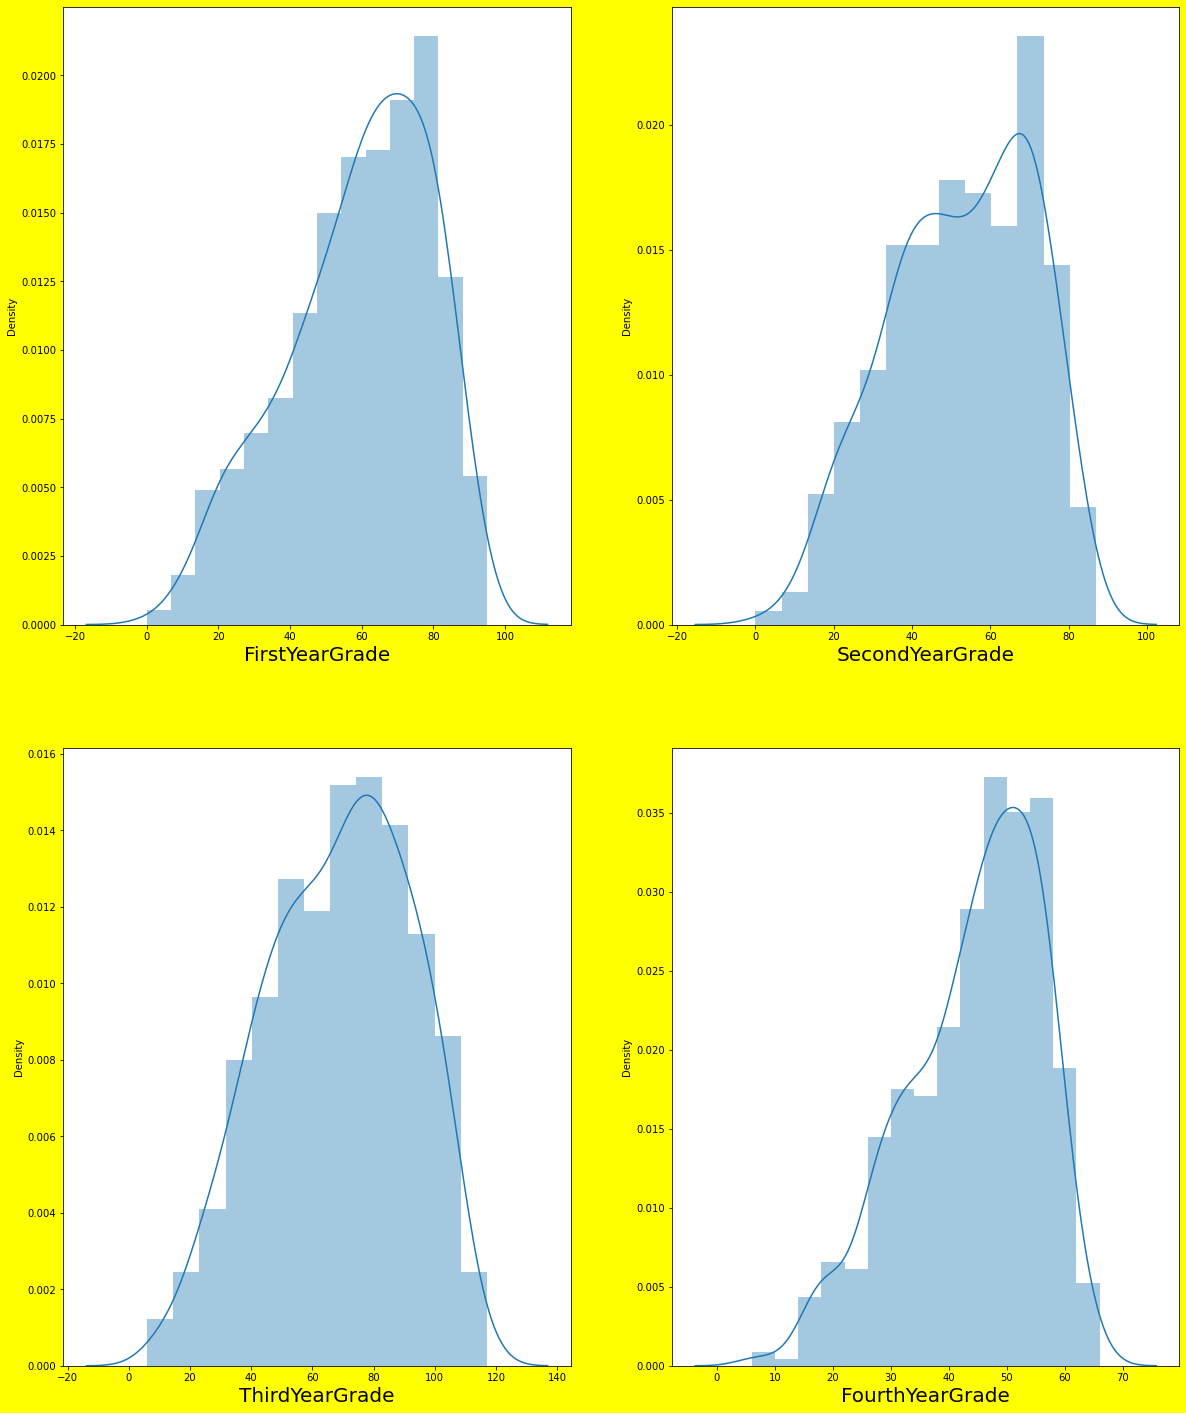

In [300]:
#To check the distribution of the data in every column
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for columns in df_new:
    if plotnumber<=4:            
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df_new[columns])
        plt.xlabel(columns,fontsize=20)
    
    plotnumber+=1
plt.show()
               

In [301]:
#Checking the correlation of the dataframe.
df_new.corr()

,FirstYearGrade,SecondYearGrade,ThirdYearGrade,FourthYearGrade,CGPA
FirstYearGrade,1.000000,0.830161,0.744956,0.610097,0.907363
SecondYearGrade,0.830161,1.000000,0.843067,0.732339,0.893879
ThirdYearGrade,0.744956,0.843067,1.000000,0.851207,0.861326
FourthYearGrade,0.610097,0.732339,0.851207,1.000000,0.768273
CGPA,0.907363,0.893879,0.861326,0.768273,1.000000


In [302]:
#divinding the data into the labels and the features. 
X = df.drop(columns=['CGPA'])
Y = df['CGPA']

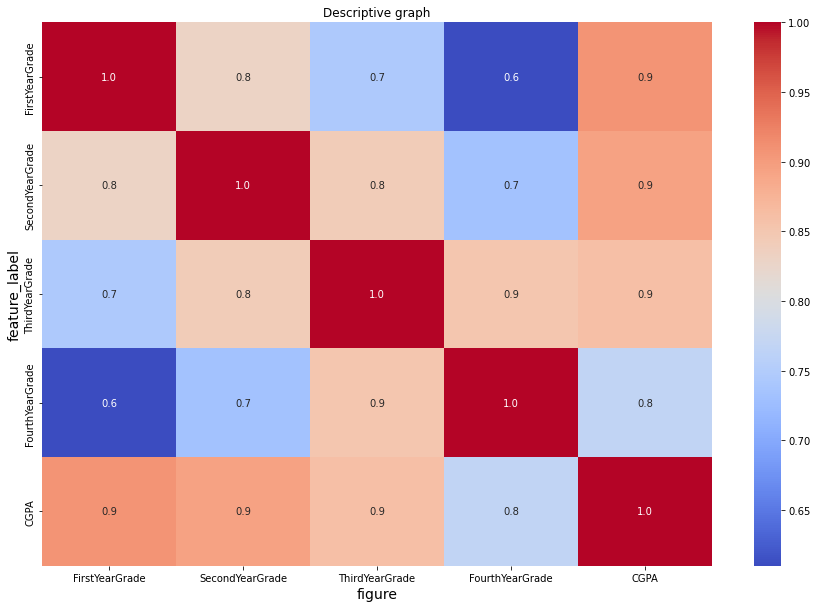

In [303]:
# Plotting the correlation on the graph. 
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.1f")
plt.title("Descriptive graph")
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_label',fontsize=14)
plt.show()

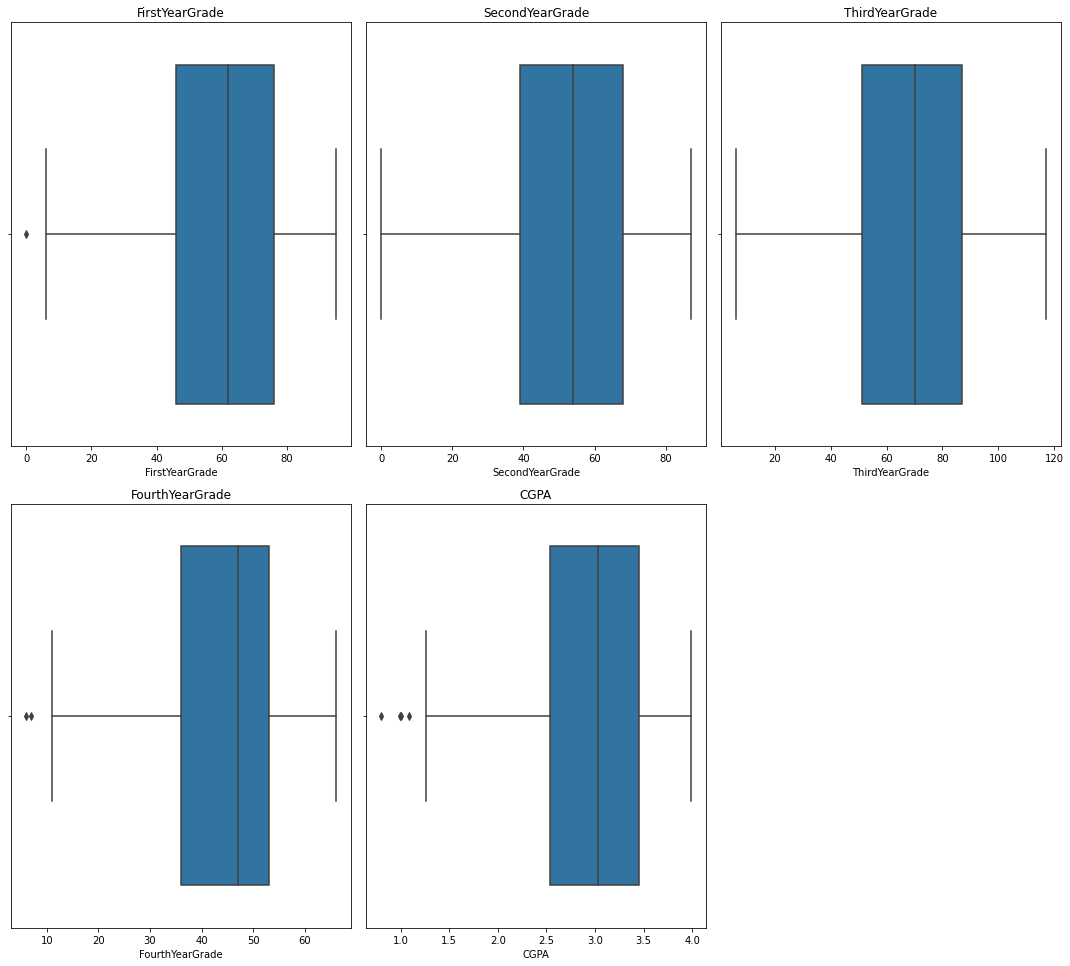

In [304]:
plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1

for feature in df_new.columns:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1

plt.tight_layout()
plt.show()


In [305]:
#divinding the data into the labels and the features. 
X1 = df_new.drop(columns=['CGPA'])
Y1 = df_new['CGPA']

In [306]:
from scipy.stats import zscore
out_features=df_new[['FirstYearGrade','FourthYearGrade']]
z=np.abs(zscore(out_features))
z

,FirstYearGrade,FourthYearGrade
0,1.810561,0.616324
1,1.560651,1.392810
2,0.688545,1.022925
3,1.960508,1.565363
4,1.088403,0.850373
...,...,...
566,1.238349,1.022925
567,1.538242,0.591544
568,1.088403,0.591544
569,0.960865,1.651639


In [307]:
#threshold=3
np.where(z>3)

(array([447, 454], dtype=int64), array([1, 1], dtype=int64))

In [308]:
z.iloc[454,1]

3.2908887071171073

In [309]:
df_new1 = df_new[(z < 3).all(axis=1)]
print(df_new.shape)

(571, 5)


In [310]:
#Calculate z-scores
z = np.abs(zscore(X1))

In [311]:
#Filtering features and target for z-scores less than 3
X = X1[(z < 3).all(axis=1)]
Y = Y1[(z < 3).all(axis=1)]

In [329]:
#Shape of old and new dataframe
print("old Data Frame : ",df_new.shape[0])
print("New Data Frame : ",df_new1.shape[0])

old Data Frame :  571
New Data Frame :  569


In [330]:
print("Data Loss Percentage = ",((df_new.shape[0]-df_new1.shape[0])/df.shape[0])*100)

Data Loss Percentage =  0.3502626970227671


In [331]:
df_new2 = df_new1

In [332]:
X1

,FirstYearGrade,SecondYearGrade,ThirdYearGrade,FourthYearGrade
0,23,36,41,37
1,28,21,28,28
2,73,80,87,56
3,20,23,28,26
4,81,72,72,54
...,...,...,...,...
566,84,78,101,56
567,90,67,105,51
568,81,63,81,51
569,40,28,36,25


In [333]:
Y1

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [334]:
# Features scaling using 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
x_scaled

,FirstYearGrade,SecondYearGrade,ThirdYearGrade,FourthYearGrade
0,-1.810561,-0.908919,-1.171841,-0.616324
1,-1.560651,-1.729418,-1.723921,-1.392810
2,0.688545,1.497878,0.781673,1.022925
3,-1.960508,-1.620018,-1.723921,-1.565363
4,1.088403,1.060278,0.144658,0.850373
...,...,...,...,...
566,1.238349,1.388478,1.376221,1.022925
567,1.538242,0.786778,1.546092,0.591544
568,1.088403,0.567979,0.526867,0.591544
569,-0.960865,-1.346519,-1.384179,-1.651639


In [335]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=22)
X1_train  

,FirstYearGrade,SecondYearGrade,ThirdYearGrade,FourthYearGrade
334,53,61,68,48
414,51,60,76,51
31,68,62,55,47
77,62,59,80,59
40,65,52,67,48
...,...,...,...,...
491,61,54,66,37
502,54,46,55,41
358,68,57,86,47
356,72,71,92,49


In [336]:
y1_train

334    2.995
414    3.103
31     3.133
77     3.295
40     3.033
       ...  
491    2.947
502    2.782
358    3.253
356    3.451
132    2.407
Name: CGPA, Length: 456, dtype: float64

In [337]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [338]:
lr = LinearRegression()
lr.fit(X1_train, y1_train)

rfr = RandomForestRegressor()
rfr.fit(X1_train, y1_train)

gr = GradientBoostingRegressor()
gr.fit(X1_train, y1_train)

dt = DecisionTreeRegressor()
dt.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [339]:
# Prection on the test data. 
y_pred1 = lr.predict(X1_test)
y_pred2 = rfr.predict(X1_test)
y_pred3 = gr.predict(X1_test)
y_pred4 = dt.predict(X1_test)
df2 = pd.DataFrame({'Actual': y_test, 'Lr': y_pred1, 'rfr': y_pred2, 'gr': y_pred3,'dt':y_pred4,})

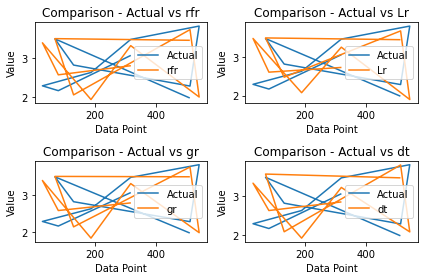

In [340]:
plt.subplot(221)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['rfr'].iloc[0:10], label="rfr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs rfr')
plt.legend()

# Repeat the above code for other subplots (222, 223, 224)
plt.subplot(222)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['Lr'].iloc[0:10], label="Lr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs Lr')
plt.legend()

plt.subplot(223)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['gr'].iloc[0:10], label="gr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs gr')
plt.legend()

plt.subplot(224)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['dt'].iloc[0:10], label="dt")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs dt')
plt.legend()

plt.tight_layout()
plt.show()

In [341]:
df_new2

,FirstYearGrade,SecondYearGrade,ThirdYearGrade,FourthYearGrade,CGPA
0,23,36,41,37,2.205
1,28,21,28,28,2.008
2,73,80,87,56,3.608
3,20,23,28,26,1.906
4,81,72,72,54,3.448
...,...,...,...,...,...
566,84,78,101,56,3.798
567,90,67,105,51,3.772
568,81,63,81,51,3.470
569,40,28,36,25,2.193


In [342]:
#Algorythm using R2 
from sklearn import metrics

In [343]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [344]:
print(score1,score2,score3,score4)

-1.4808393416932861 -1.4134412507399325 -1.5204786203673248 -1.4524662020817307


In [345]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2= metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [346]:
print(s1,s2,s3,s4)

0.7481950931915705 0.7396179130434785 0.7532004279528869 0.7384521739130433


Lower is better : which shows that 2nd and 4th models are performing the best.

In [348]:
#Model_Predict 
data_Predict = {'FirstYearGrade':19,
               'SecondYearGrade':22,
                'ThirdYearGrade':25,
                'FourthYearGrade':20,}
df_pred = pd.DataFrame(data_Predict,index=[0])
df_pred

,FirstYearGrade,SecondYearGrade,ThirdYearGrade,FourthYearGrade
0,19,22,25,20


In [351]:
new_pred = gr.predict(df_pred)
print(new_pred)

[1.73806922]


In [ ]:
`